In [1]:
import random
from math import pi, cos, sin, sqrt, exp
import matplotlib.pyplot as plt
import numpy as np

# Trabajo Práctico 1 - Ejercicio 1 a 6

## Introducción

En el presente notebook se expone el código realizado para realizar el trabajo práctico con las aclaraciones necesarias para que se entiendan mejor los gráficos y para realizar un análisis a los mismos.

## Ejercicio 1

a) Implementar un Generador Congruencial Lineal (GCL) de módulo 2^32, multiplicador 1013904223, incremento de
1664525 y semilla igual a la parte entera del promedio de los números de padrón de los integrantes del grupo.

In [2]:
semilla = (99732 + 100687 + 99627 + 98625)//4
print(semilla)

99667


In [3]:
def gcl(estado_inicial):
    nuevo_estado = (1013904223 * estado_inicial + 1664525) % 2**32
    return nuevo_estado, nuevo_estado

b) Modificar el GCL implementado en el punto a) para que devuelva números al azar entre 0 y 1

In [4]:
def gcl_reduce(estado_inicial):
    nuevo_estado, semilla_nueva = gcl(estado_inicial)
    return nuevo_estado/2**32, semilla_nueva

c) Realizar los gráficos que considere necesarios para mostrar las distribuciones de números al azar generados en los puntos a) y b)

In [5]:
def numeros_random(muestra, generador, semilla):
    estado_actual = semilla
    resultado = []
    for i in range(muestra):
        numero_random, estado_actual = generador(estado_actual)
        resultado.append(numero_random)
    return resultado

In [6]:
muestra = 50000
resultado_gcl = numeros_random(muestra, gcl, semilla)
resultado_gcl_reduce = numeros_random(muestra, gcl_reduce, semilla)

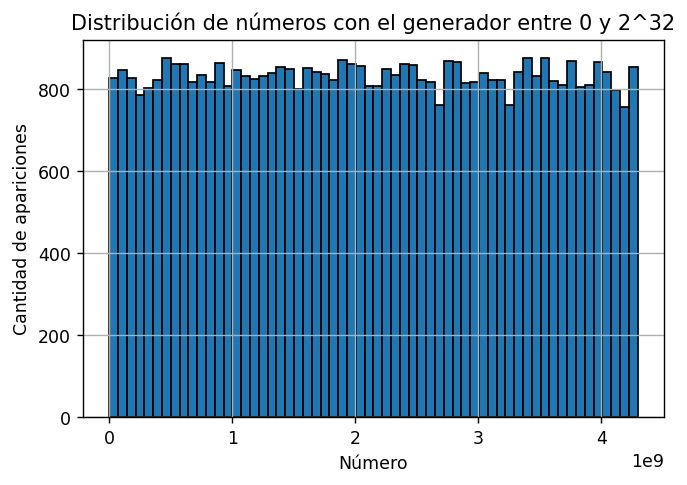

In [7]:
plt.figure(dpi=125)
plt.title('Distribución de números con el generador entre 0 y 2^32')
plt.hist(resultado_gcl, bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.ylabel("Cantidad de apariciones")
plt.xlabel("Número")
plt.show()

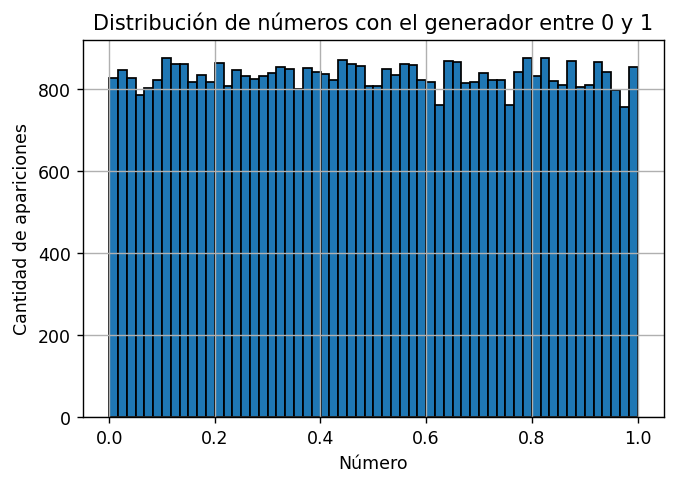

In [8]:
plt.figure(dpi=125)
plt.title('Distribución de números con el generador entre 0 y 1')
plt.hist(resultado_gcl_reduce, bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.ylabel("Cantidad de apariciones")
plt.xlabel("Número")
plt.show()

d) Basándose en el generador implementado en el ítem a, implemente el generador aditivo propuesto por Mitchell y Moore

El generador aditivo propuesto por Mitchell y Moore se basa en el siguiente supuesto:

$$𝑥_{𝑖+1} = ( 𝑥_{𝑖−24} + 𝑥_{𝑖−55}) \% 2^{24}$$

Donde $𝑥_{0}$, $𝑥_{1}$, … , $𝑥_{54}$ son números arbitrarios no todos iguales.

Para lograr implementar el generador propuesto por Mitchell y Moore se toman 55 estados iniciales a partir de los cuales se calcular los siguientes estados. 

In [9]:
def gen_mm(estados_previos):
    i = len(estados_previos)
    nuevo_estado = (estados_previos[i-24] + estados_previos[i-55])% 2**24
    estados_previos.append(nuevo_estado)
    return nuevo_estado, estados_previos

Los 55 estados iniciales se calcularon con el generador de numeros aleatorios calculado en el inciso a).

In [10]:
estados_iniciales = numeros_random(55, gcl, semilla)
resultado_gen_mm = numeros_random(muestra, gen_mm, estados_iniciales)

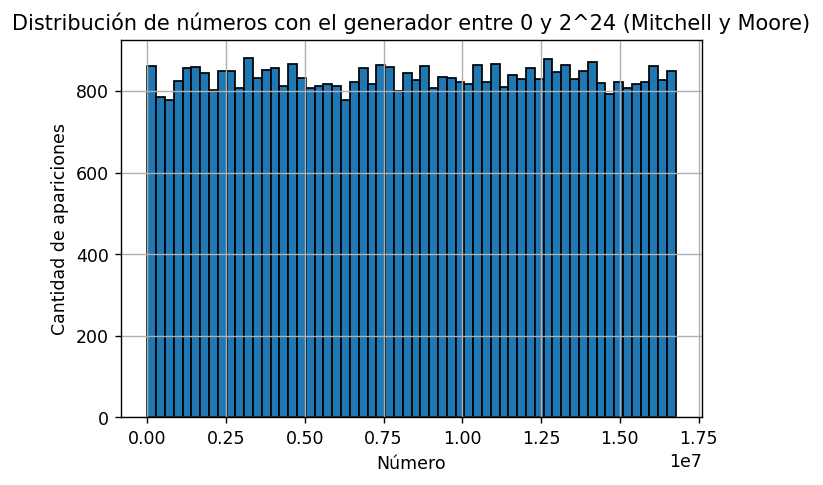

In [11]:
plt.figure(dpi=125)
plt.title('Distribución de números con el generador entre 0 y 2^24 (Mitchell y Moore)')
plt.hist(resultado_gen_mm, bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.xlabel("Número")
plt.ylabel("Cantidad de apariciones")
plt.show()

## Ejercicio 2
Para cada uno de los generadores del ejercicio 1, proponer, y realizar, al menos 2 tests para evaluar su comportamiento. Evaluar e interpretar los resultados de cada uno para distintos tamaños de muestras.

Los tests que se realizaran a continuación para verificar que los generadores del ejercicio anterior se ajustan a una uniforme son:
- Test Chi Cuadrado
- Test de Kolmogorov Smirnov

Para ambos se utilizó un nivel de significacion de 1%

### Test 1 Chi2 con nivel de significacion 1%

El método consiste en comparar dos distribuciones de probabilidades. En primer lugar, se utiliza una obtenida luego de realizar un experimento (llamada distribución observada) y luego una que se cree que el experimento sigue (llamada distribución esperada).

La idea general es que cuanto más chica sea la diferencia entre los valores
obtenidos en cada una habrá una mayor concordancia entre las dos.
Esa diferencia entre los valores obtenidos en el experimento y los valores
esperados es lo que será medido con el estadístico Chi2.

En nuestro caso la distribución observada son los numeros aleatorios generados con los distintos generadores y la distribución esperada es la uniforme.

Dado que estamos comparando contra una distribución continua para poder aplicar el método debemos discretizar la distribución.

Pasos a seguir:
1) Elegir el nivel de significación con el que vamos a trabajar. Por lo general se utilizan valores como 0,01 o 0,05 **-> Se eligió 1%**

2) Obtener el límite de la zona de aceptación/rechazo para k-1 grados de libertad **-> Grados de libertad: cantidad de baldes-1**

3) Calcular el estadístico con los datos del experimento en estudio **-> P(numero): 1/baldes**

4) Comparar el límite contra el estadístico obtenido

Para el test se plantearon las siguientes hipotesis buscando aceptar la nula:
- **H0**: La distribución es uniforme
- **H1**: La distribución no es uniforme

In [12]:
from scipy.stats import chi2

def chi_cuadrado(resultado, muestra, baldes): 
    # Discretización
    frecuencias = np.histogram(resultado, bins=baldes)[0] 

    D2 = sum([(fO - (1/baldes)*muestra)**2 for fO in frecuencias])/((1/baldes)*muestra)
    limiteSuperior = chi2.ppf(0.99, df=baldes-1)# Nivel de significacion 1%

    print("Limite superior: {:.2f} ".format(limiteSuperior))

    print("Estadistico: {:.2f} ".format(D2))

    if D2 <= limiteSuperior:
     print("El test no rechaza la hipotesis nula.")
    else:
     print("El test rechaza la hipótesis nula.")

**Generador GCL vs Uniforme**

In [13]:
# Uniforme gcl
chi_cuadrado(resultado_gcl, muestra, 10)

Limite superior: 21.67 
Estadistico: 5.63 
El test no rechaza la hipotesis nula.


**Generador GCL Reducido (entre 0 y 1) vs Uniforme**

In [14]:
# Uniforme gcl_reduce
chi_cuadrado(resultado_gcl_reduce, muestra, 10)

Limite superior: 21.67 
Estadistico: 5.63 
El test no rechaza la hipotesis nula.


**Generador Generador Mitchell y Moore vs Uniforme**

In [15]:
# Uniforme gen_mm
chi_cuadrado(resultado_gen_mm, muestra, 10)

Limite superior: 21.67 
Estadistico: 8.41 
El test no rechaza la hipotesis nula.


### Resultados

Para los tres generadores no se rechaza la hipótesis nula por lo tanto no hay evidencia que descarte que la distribución sea uniforme.

### Test 2 Kolmogorov Smirnov con nivel de significacion 1%

El método se utiliza para variables aleatorias continuas.

Consiste en comparar dos distribuciones de probabilidad
acumulada, una elegida como hipótesis nula y otra generada de forma
empírica a partir de las observaciones realizadas a la variable que se
encuentra en estudio.

Para el test se plantearon las mismas hipotesis que para el test anterior buscando aceptar la nula:
- **H0**: La distribución es uniforme
- **H1**: La distribución no es uniforme

Pasos a seguir:
1) Elegir el nivel de significación con el que vamos a trabajar. Por lo general se utilizan valores como 0,01 o 0,05 **-> Se eligió 1%**

2) Obtener el límite de la zona de aceptación/rechazo

3) Calcular el estadístico con los datos del experimento en estudio **-> F_obs(x) = cantidad de Xi <= x / n**

4) Comparar el límite contra el estadístico obtenido

In [16]:
from scipy.stats import uniform, kstest

def proba_acumulada(generados, x): # TODO: Optimizar
    suma_menores = 0
    for gen in generados:
        if gen <= x:
            suma_menores +=1
    return suma_menores/len(generados)

In [17]:
def ks_custom(resultado, muestra, max_rango = 1):
    max_dif = 0
    aux = 0
    for i in range(muestra):
        aux = abs( proba_acumulada(resultado, resultado[i]) - uniform.cdf(resultado[i], loc=0, scale=max_rango) )
        if aux > max_dif:
            max_dif = aux
    return max_dif

In [18]:
def evaluar_kstest(resultado, distribucion, args=None, alfa = 0.01):
    if not args:
        d, pvalor = kstest(resultado, distribucion)
    else:
        d, pvalor = kstest(resultado, distribucion, args=args)
    print(d)
    print(pvalor)
    # queremos confianza al 99%
    if pvalor < alfa:
        print("El test rechaza la hipotesis nula.")
    else:
        print("El test no rechaza la hipotesis nula.")

**Generador GCL vs Uniforme**

In [19]:
# Uniforme gcl
print(ks_custom(resultado_gcl, muestra, 2**32))

0.0032152038133889116


In [20]:
evaluar_kstest(resultado_gcl, 'uniform', args= (0, 2**32))

0.0032152038133889116
0.6782646826588501
El test no rechaza la hipotesis nula.


**Generador GCL Reducido (entre 0 y 1) vs Uniforme**

In [21]:
# Uniforme gcl_reduce
print(ks_custom(resultado_gcl_reduce, muestra))

0.0032152038133889116


In [22]:
evaluar_kstest(resultado_gcl_reduce, 'uniform', args=(0,1))

0.0032152038133889116
0.6782646826588501
El test no rechaza la hipotesis nula.


**Generador Generador Mitchell y Moore vs Uniforme**

In [23]:
# Uniforme gen_mm
print(ks_custom(resultado_gen_mm, muestra, 2**24))

0.002538340568542463


In [24]:
evaluar_kstest(resultado_gen_mm, 'uniform', args= (0, 2**24))

0.002558340568542483
0.8981157934441458
El test no rechaza la hipotesis nula.


### Resultados

Igual al test realizado anteriormente, se acepta la hipótesis nula para los tres generadores por lo que no hay evidencia que demuestre que la distribución no sea uniforme.

## Ejercicio 3
Se desea generar puntos al azar con distribución uniforme dentro del área descripta en el gráfico utilizando los siguientes
generadores de números al azar:

1. Generadores de números al azar con distribución uniforme, provistos por el lenguaje elegido para resolver el TP.
2. Alguno de los generadores de números al azar implementados con el algoritmo del ejercicio 1.
3. Calcule el factor de rendimiento del método.

![](grafico_ej3.png)

Para generar los puntos dentro del circulo se tomaron dos caminos:

1. El primero implica forzar la generación de los puntos dentro del circulo, es decir se generan números aleatorios y luego se aplica el módulo del radio y se corre al centro del círculo. Esto se puede observar en la función `point_in_circle`.

2. El segundo camino consiste en el método de Aceptación y Rechazo que implica generar numeros aleatorios y verificar si se encuentran o no en el circulo (si cumplen o no con la distribución pedida) y solo en el caso en que se encuentren dentro agregarlo a la solución, para esto se utilizó la funcion `is_point_in_circle`.

La diferencia entre ambos métodos es que en el primero todos los puntos que generamos los tenemos dentro del círculo entonces la muestra final es del tamaño que esperábamos pero en el segundo método la cantidad de puntos que esten dentro del circulo depende de los resultados del generador.
    

In [25]:
random.seed(semilla)

Para la generación de puntos dentro del círculo se hace uso de las coordenadas polares para obtener fácilmente un punto dentro del círculo a partir de un ángulo y un radio determinados.

In [26]:
def point_in_circle(c_x, c_y, r, gen):
    radio =  gen() % r
    theta = gen() * 2 * pi
    return c_x + cos(theta) * radio, c_y + sin(theta) * radio

Para verificar si un punto es válido o no, es decir si se encuentra dentro del círculo o no, utilizamos la ecuación:

$$(x - centro_x)^2 + (y - centro_y)^2 <= radio^2$$

En este caso:
- centro_x = 10
- centro_y = 10
- radio = 5

In [27]:
def is_point_in_circle(x, y, r, centrox, centroy):
    return (x - centrox)**2 + (y - centroy)**2 <= r**2

a) Generadores de números al azar con distribución uniforme, provistos por el lenguaje elegido para resolver el tp

### Primer camino

Se utiliza la uniforme de Python y se fuerza la generación de los números para que sean puntos dentro del círculo:

In [28]:
# a
muestra = 100000
def python_random():
    result = []
    uniform = lambda: random.uniform(0,360)
    for i in range(muestra):
        result.append(point_in_circle(10,10,5,uniform))
    return result

In [29]:
result_python = python_random()

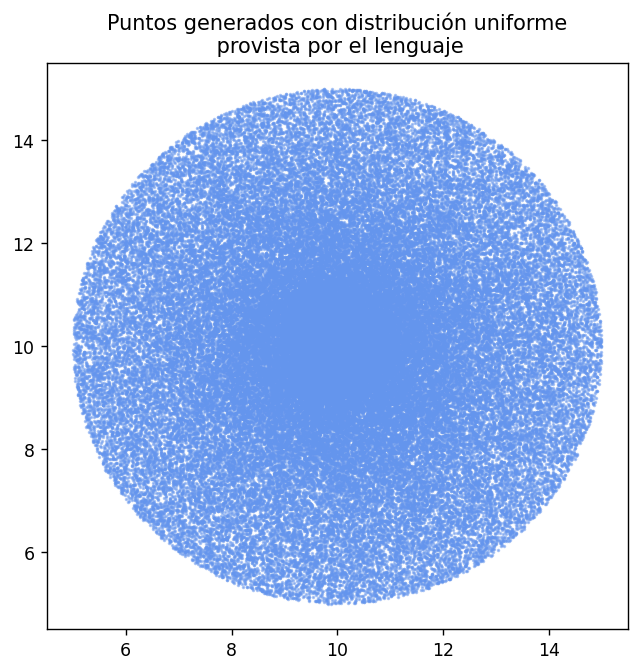

In [30]:
plt.figure(dpi=125, figsize=(6, 6))
plt.scatter([p[0] for p in result_python], [p[1] for p in result_python], color="cornflowerblue", alpha=0.5, s=1)
plt.title("Puntos generados con distribución uniforme\n provista por el lenguaje")
plt.show()

## Segundo camino

Se usa la uniforme de Python y se chequea si el número generado pertenece al círculo:

In [31]:
# a
muestra = 100000
def python_random_2():
    result = []
    rejected_points = []
    for i in range(muestra):
        x, y = random.uniform(5, 15), random.uniform(5, 15)
        if is_point_in_circle(x, y, 5, 10, 10):
            result.append((x, y))
        else:
            rejected_points.append((x, y))
    return result, rejected_points

In [32]:
result_python_2, rejected_points = python_random_2()

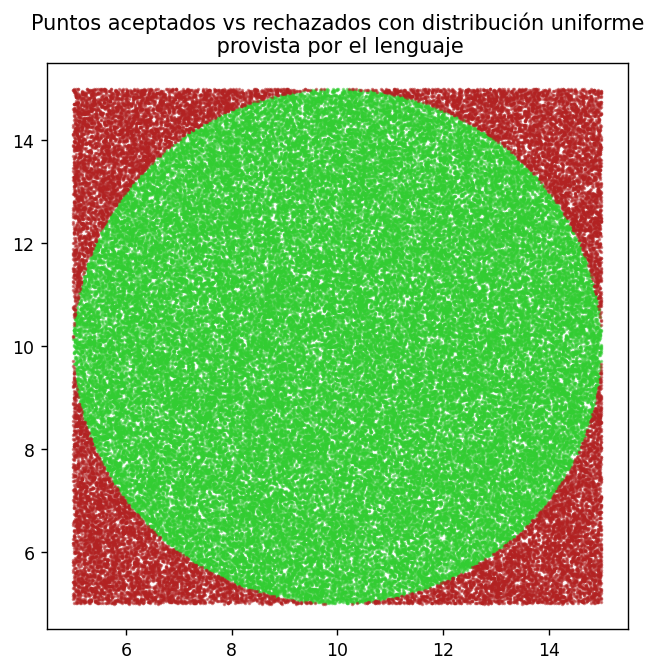

In [33]:
plt.figure(dpi=125, figsize=(6, 6))
plt.scatter([p[0] for p in result_python_2], [p[1] for p in result_python_2], color="limegreen", alpha=0.5, s=1)
plt.scatter([p[0] for p in rejected_points], [p[1] for p in rejected_points], color="firebrick", alpha=0.5, s=1)
plt.title("Puntos aceptados vs rechazados con distribución uniforme\n provista por el lenguaje")
plt.show()

b) Alguno de los generadores de números al azar implementados con el algoritmo del ejercicio 1.

### Camino 1

Se utiliza nuestro generador entre (0,1) y se fuerza la generación de los puntos dentro del circulo:

In [34]:
# b
muestra = 100000

def gcl_random():
    result = []
    global estado_actual
    estado_actual = semilla
    def gen_propio():
        global estado_actual
        numero_random, estado_actual = gcl_reduce(estado_actual)
        return (numero_random%360)*5
    for i in range(muestra):
        result.append(point_in_circle(10,10,5,gen_propio))
    return result

In [35]:
result_gcl = gcl_random()

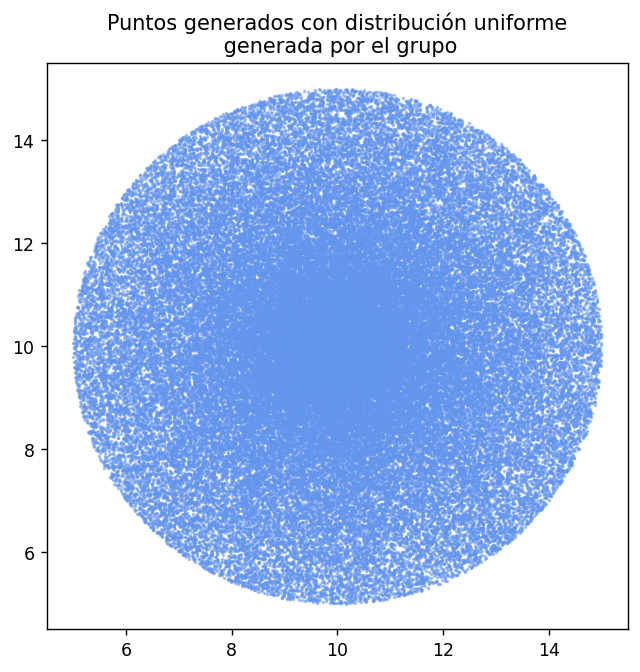

In [36]:
plt.figure(dpi=125, figsize=(6, 6))
plt.scatter([p[0] for p in result_gcl], [p[1] for p in result_gcl], color="cornflowerblue", alpha=0.5, s=1)
plt.title("Puntos generados con distribución uniforme\n generada por el grupo")
plt.show()

### Camino 2

Se usa nuestro generador entre (0,1) y se chequea si el punto generado está dentro del círculo:

In [37]:
# b
muestra = 100000

def gcl_random_2():
    result = []
    rejected_points = []
    estado_actual = semilla            
    for i in range(muestra):
        x, estado_actual = gcl_reduce(estado_actual)
        x = x*10+5
        y, estado_actual = gcl_reduce(estado_actual)
        y = y*10+5
        if is_point_in_circle(x, y, 5, 10, 10):
            result.append((x, y))
        else:
            rejected_points.append((x, y))
    return result, rejected_points

In [38]:
result_gcl_2, rejected_points_gcl = gcl_random_2()

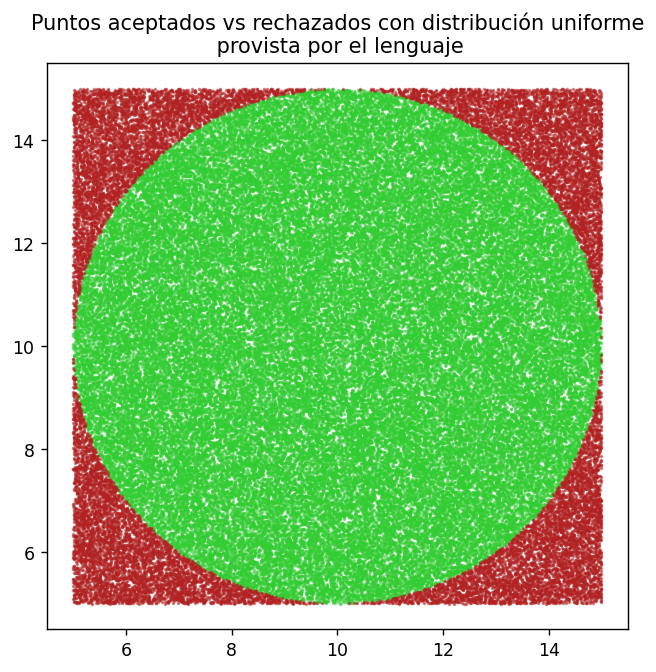

In [39]:
plt.figure(dpi=125, figsize=(6, 6))
plt.scatter([p[0] for p in result_gcl_2], [p[1] for p in result_gcl_2], color="limegreen", alpha=0.5, s=1)
plt.scatter([p[0] for p in rejected_points_gcl], [p[1] for p in rejected_points_gcl], color="firebrick", alpha=0.5, s=1)
plt.title("Puntos aceptados vs rechazados con distribución uniforme\n provista por el lenguaje")
plt.show()

c) Calcule el factor de rendimiento del método.

Para poder evaluar el factor de rendimiento se utilizó la solución del segundo camino que generaba números y se fijaba si estaban o no dentro del circulo para evaluar cuántos de los puntos generados fueron rechazados con respecto al tamaño de la muestra. Como fue mencionado previamente, si se utilizaba los números generados con el primer método el factor de rendimiento sería de 100% ya que todos los números generados están dentro del círculo.

**Factor de rendimiento usando la función de Python**

In [40]:
# c 
r_uniform = len(result_python_2) / muestra
print(r_uniform)

0.7858


**Factor de rendimiento usando el generador implementado**

In [41]:
# c 
r_gcl = len(result_gcl_2) / muestra
print(r_gcl)

0.78695


#### Resultados

A partir de los factores de rendimiento podemos concluir que nuestro generador tuvo un mejor rendimiento que el provisto por el lenguaje dado que menos puntos fueron rechazados.

## Ejercicio 4
Para la siguiente densidad de probabilidad, se pide:

![](densidad_ej4.png)

a) Definir la función de densidad de probabilidad.

$$ f_x(x)=  \left\{
\begin{array}{ll}
      \frac{1}{15}x - \frac{1}{15} & x\geq1 \land x<4 \\
      -\frac{2}{45}x + \frac{17}{45} & x\geq4 \land x<6 \\
      \frac{1}{9} & x\geq6 \land x<9 \\
      \frac{-1}{9}x +\frac{10}{9} & x\geq9 \land x<10 \\
      0 & otro caso \\
\end{array} 
\right. $$ 

In [42]:
def funcion_densidad(x):
    if x>=1 and x<4:
        return 1/15*(x - 1)
    elif x>=4 and x<6:
        return 1/45*(17 - 2*x)
    elif x>=6 and x<9:
        return 1/9
    elif x>=9 and x<10:
        return 1/9 * (10 - x)
    return 0

b) Calcular y graficar la función de probabilidad acumulada y su inversa.

En un primer lugar se calcula la función de probabilidad acumulada:


$$F_x(x)=\int_{-\infty}^{x} f_x(x)\ dx= \left\{
\begin{array}{ll}
      0 & x<1 \\
      \frac{1}{30}*(x-1)^2 & x\geq1 \land x<4 \\
      \frac{3}{10} + \frac{1}{45}(- x^2 + 17x - 52) & x\geq4 \land x<6 \\
      \frac{11}{18} + \frac{x}{9} - \frac{2}{3} & x\geq6 \land x<9 \\
      \frac{17}{18} + \frac{1}{18}*(-x^2 + 20x - 99) & x\geq9 \land x<10 \\
      1 & x\geq10
\end{array} 
\right. $$

In [43]:
def probabilidad_acumulada(x):
    if x<=1:
        return 0
    elif x>=1 and x<4:
        return 1/30*(x - 1)**2
    elif x>=4 and x<6:
        return 3/10 + 1/45*(- x**2 + 17*x - 52)
    elif x>=6 and x<9:
        return 11/18 + x/9 - 2/3
    elif x>=9 and x<10:
        return 17/18 + 1/18*(- x**2 + 20*x - 99)
    return 1

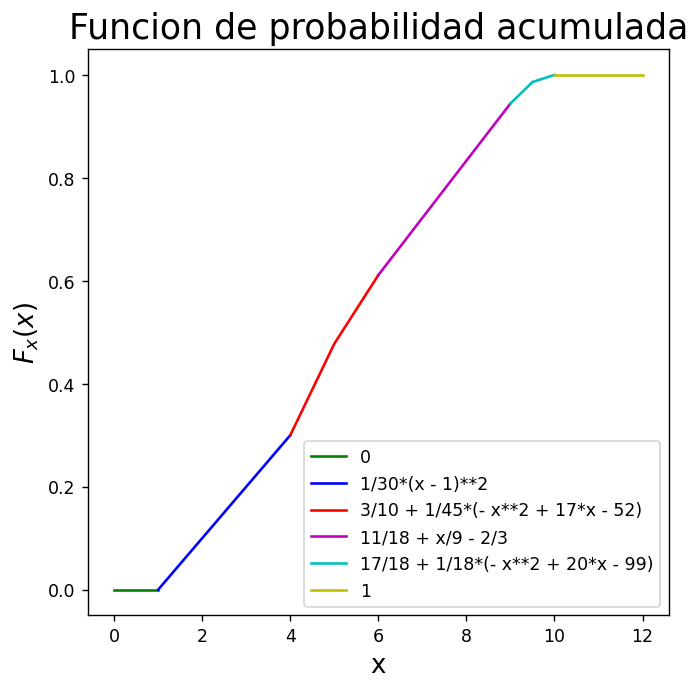

In [44]:
x1 = np.linspace(0, 1, num=3)
x2 = np.linspace(1, 4, num=2)
x3 = np.linspace(4, 6, num=3)
x4 = np.linspace(6, 9, num=3)
x5 = np.linspace(9, 10, num=3)
x6 = np.linspace(10, 12, num=3)
 
plt.figure(dpi=125, figsize=(6, 6))
plt.plot(x1, [0 for x in x1], 'g', label='0')
plt.plot(x2, [probabilidad_acumulada(x) for x in x2], 'b', label='1/30*(x - 1)**2')
plt.plot(x3, [probabilidad_acumulada(x) for x in x3], 'r', label='3/10 + 1/45*(- x**2 + 17*x - 52)')
plt.plot(x4, [probabilidad_acumulada(x) for x in x4], 'm', label='11/18 + x/9 - 2/3')
plt.plot(x5, [probabilidad_acumulada(x) for x in x5], 'c', label='17/18 + 1/18*(- x**2 + 20*x - 99)')
plt.plot(x6, [probabilidad_acumulada(x) for x in x6], 'y', label='1')
 
    
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

plt.title("Funcion de probabilidad acumulada", size =20)
plt.xlabel("x", size=15)
plt.ylabel('$F_x(x)$', size=15)
plt.legend()
plt.show()

Luego se calcula la inversa de la función de probabilidad acumulada:

Si $F_X(x) = P(X \leq x) = y$ => $F_X^{-1}(y) = x$

Se reemplaza el valor de los extremos en los distintos intervalos para obtener los extremos de la función inversa y se halla el valor de la función en los mismos.

$$F_X^{-1}(y)= \left\{
\begin{array}{ll}
      \sqrt{30y} + 1 & y\geq0 \land y<\frac{3}{10} \\
      \frac{17}{2} - \frac{3}{2} * \sqrt{-20y+15} & y\geq\frac{3}{10} \land y<\frac{11}{18} \\
      9y + \frac{1}{2} & y\geq \frac{11}{18} \land y<\frac{17}{18} \\
      10 - 3\sqrt{-2y +2} & y\geq\frac{17}{18} \land y<1 \\
\end{array} 
\right. $$

In [45]:
def inversa_probabilidad_acumulada(y):
    if y>=0 and y<3/10:
        return sqrt(30*y) + 1
    elif y>=3/10 and y<11/18:
        return 17/2 - 3/2*sqrt(-20*y+15)
    elif y>=11/18 and y<17/18:
        return 9*y + 1/2
    elif y>=17/18 and y<1:
        return 10 - 3*sqrt(-2*y+2)

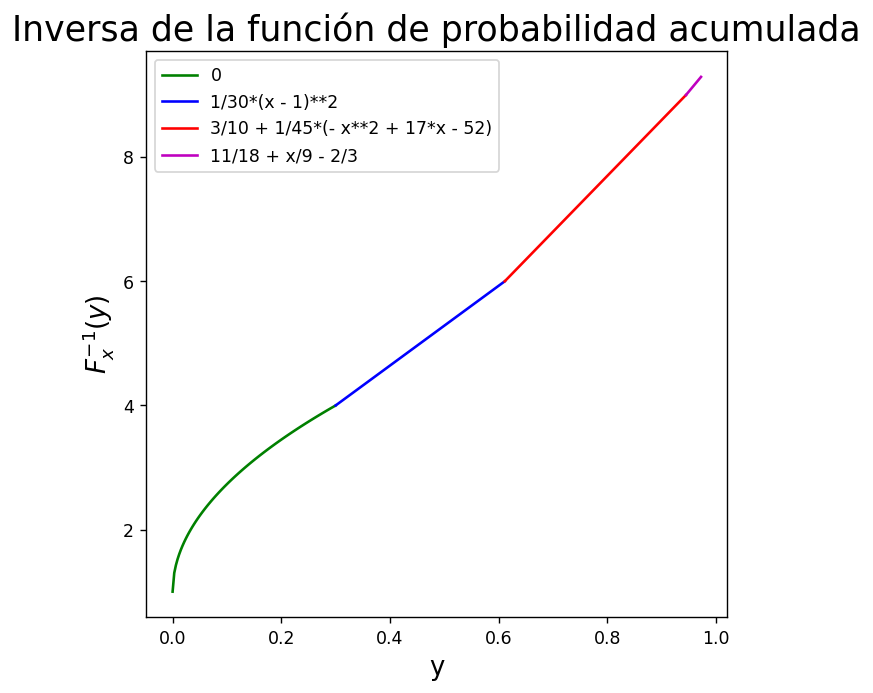

In [46]:
x1 = np.linspace(0, 3/10, num=100)
x2 = np.linspace(3/10, 11/18, num=2)
x3 = np.linspace(11/18, 17/18, num=3)
x4 = np.linspace(17/18, 1, num=3)
 
plt.figure(dpi=125, figsize=(6, 6))
plt.plot(x1, [inversa_probabilidad_acumulada(x) for x in x1], 'g', label='0')
plt.plot(x2, [inversa_probabilidad_acumulada(x) for x in x2], 'b', label='1/30*(x - 1)**2')
plt.plot(x3, [inversa_probabilidad_acumulada(x) for x in x3], 'r', label='3/10 + 1/45*(- x**2 + 17*x - 52)')
plt.plot(x4, [inversa_probabilidad_acumulada(x) for x in x4], 'm', label='11/18 + x/9 - 2/3')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

plt.title("Inversa de la función de probabilidad acumulada", size =20)
plt.xlabel("y", size=15);
plt.ylabel('$F^{-1}_x(y)$', size=15);
plt.legend();
plt.show()

c) Utilizando el generador de números aleatorios implementado en el ítem b del ejercicio 1, genere números al azar con la distribución propuesta.

Para generar numeros aleatorios con la distribucion propuesta utilizamos el generador de números entre 0 y 1 del ejercicio 1 y utilizamos el método de la transformada inversa el cual consiste en:

**Método de la Transformada Inversa**

Para generar muestras de una variable aleatoria X,
cuya función de densidad sea $f_X(x)$:
1) Generar U distribuida uniformemente en [0,1] **-> Generador GLC_reduce del ejercicio 1**

2) Aplicar la transformación $X = F^{-1}_X(U)$ **-> calculada en el inciso b)**

In [47]:
muestra = 100000
resultado_gcl_reduce = numeros_random(muestra, gcl_reduce, semilla)
generados_dist = []
for y in resultado_gcl_reduce:
    x = inversa_probabilidad_acumulada(y)
    generados_dist.append(x)
    
print(min(generados_dist), max(generados_dist))

1.0251265974942543 9.999458366719077


d) Realice los gráficos que considere necesarios para mostrar la distribución de números al azar generados.

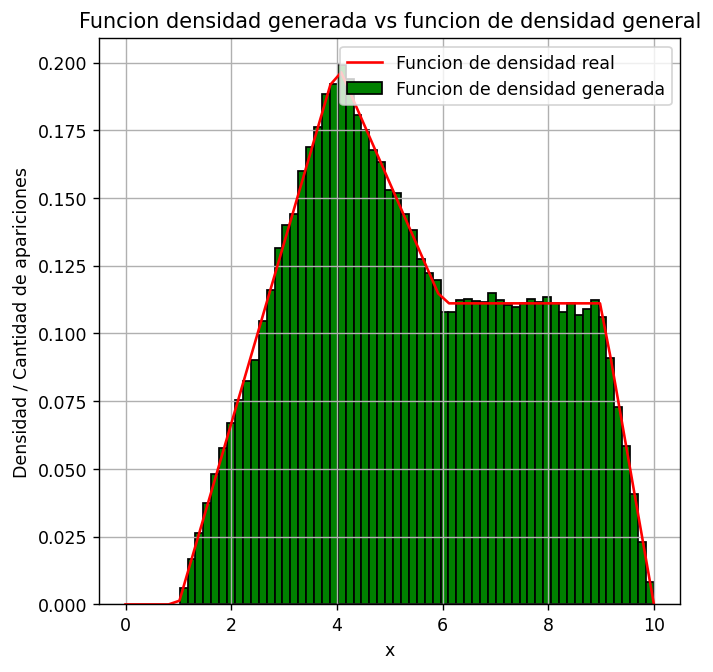

In [48]:
points = np.linspace(0,10)
plt.figure(dpi=125, figsize=(6, 6))
plt.title('Funcion densidad generada vs funcion de densidad general')
plt.plot(points, [funcion_densidad(x) for x in points], color = 'red', label='Funcion de densidad real')
plt.hist(generados_dist, density=True, bins=60, alpha=1, color='green', edgecolor = 'black', linewidth=1, label='Funcion de densidad generada')
plt.grid(True)
plt.xlabel("x")
plt.ylabel("Densidad / Cantidad de apariciones")
plt.legend()
plt.show()

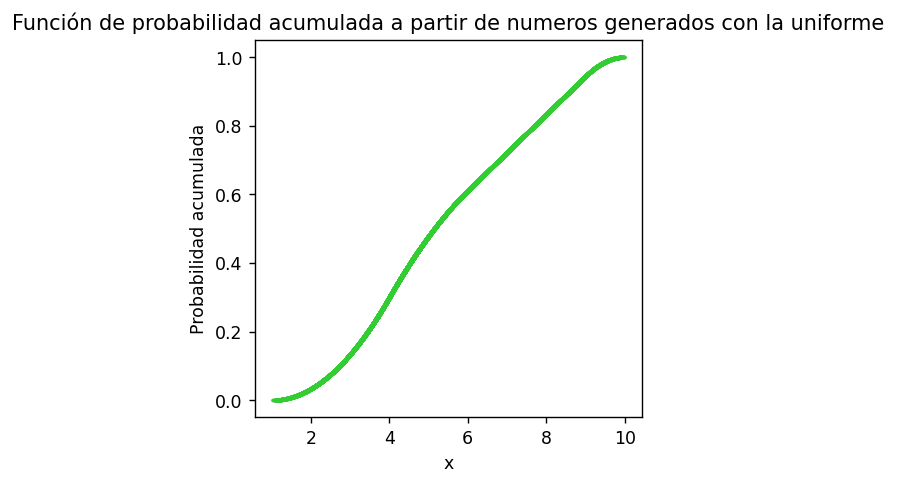

In [49]:
plt.figure(dpi=125, figsize=(4, 4))
plt.scatter(generados_dist, resultado_gcl_reduce, color="limegreen", alpha=0.5, s=1)
plt.title("Función de probabilidad acumulada a partir de numeros generados con la uniforme")
plt.xlabel("x")
plt.ylabel("Probabilidad acumulada")
plt.show()

Para demostrar que la solucion encontrada se ajusta a la funcion de densidad propuesta por la catedra aplicamos un test de Kolmogorov Smirnov con un nivel de significacion de 1%.

Planteamos las hipotesis:
- **H0**: La solucion se ajusta a la densidad $f_x(x)$
- **H1**: La solucion no se ajusta a la densidad $f_x(x)$

In [50]:
from scipy.stats import ks_2samp
points = np.linspace(0,10)

d, pvalor = ks_2samp(resultado_gcl_reduce, [funcion_densidad(x) for x in points])

if pvalor < 0.01:
    print("El test no rechaza la hipotesis nula")
else:
    print("El test rechaza la hipotesis nula")

El test no rechaza la hipotesis nula


Como no rechazamos la hipótesis nula no hay evidencia que afirme que la solución no se ajusta a la densidad.

## Ejercicio 5

1. Implemente un método para generar variables aleatorias con distribución normal con media 15 y desvío 3.
1. Muestre gráficamente la distribución que siguen los números pseudoaleatorios generados.
1. Realice 2 tests de los explicados en la materia para verificar si los números generados siguen la distribución pedida (evalué los resultados para distintos tamaños de muestra).

### Superposición

En un primer lugar se intentó sumar uniformes con el fin de llegar a la distribución normal pedida pero no conseguimos resultados exitosos.

In [51]:
cant_dist = 6
muestra = 50000
media = 0.5
desvio = 1/12

result = [0 for i in range(muestra)]
for i in range(cant_dist):
    gcl_res = numeros_random(muestra, gcl_reduce, semilla*i)
    for i in range(muestra): 
        result[i]+=gcl_res[i]
        
result_norm_standard = list(map(lambda x: (x - cant_dist*media)/sqrt(cant_dist*desvio), result))
result_norm_15_3 = list(map(lambda x: 9*x + 15, result_norm_standard))

No handles with labels found to put in legend.


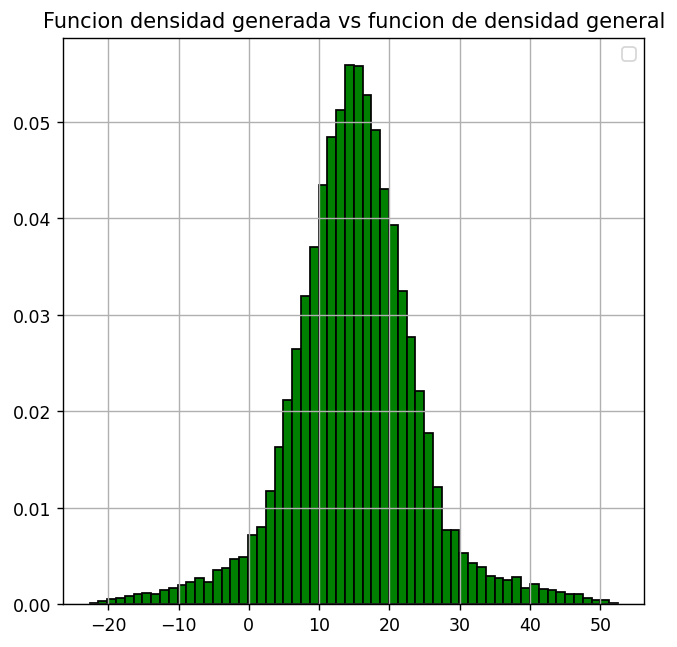

In [52]:
plt.figure(dpi=125, figsize=(6, 6))
plt.title('Funcion densidad generada vs funcion de densidad general')
plt.hist(result_norm_15_3, density=True, bins=60, alpha=1, color='green', edgecolor = 'black', linewidth=1)
plt.grid(True)
plt.legend()
plt.show()

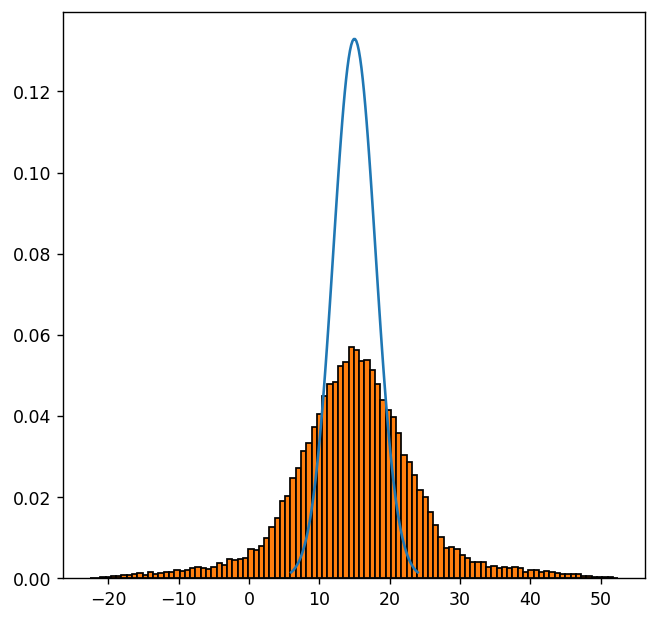

In [53]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

mu = 15
variance = 3
sigma = variance
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.figure(dpi=125, figsize=(6, 6))
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.hist(result_norm_15_3, bins=100, alpha=1, edgecolor='black', linewidth=1, density=True)
plt.show()

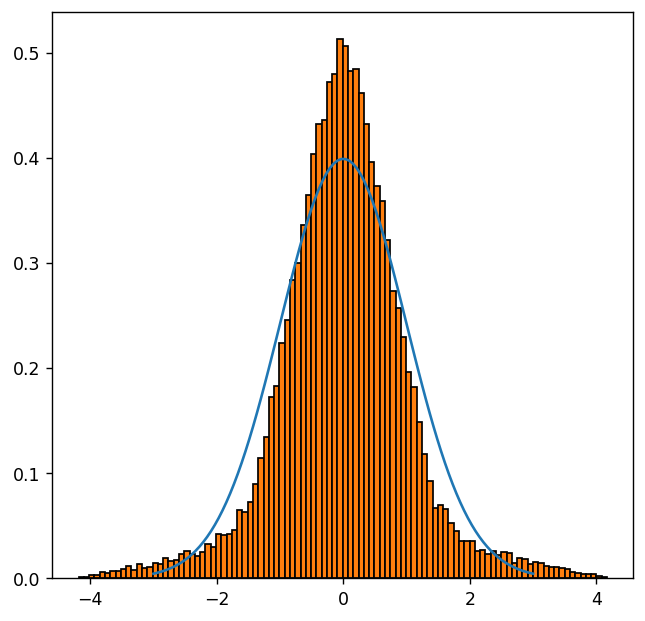

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 0
variance = 1
sigma = variance
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.figure(dpi=125, figsize=(6, 6))
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.hist(result_norm_standard, bins=100, alpha=1, edgecolor='black', linewidth=1, density=True)
plt.show()

### Aceptación y rechazo
Para generar muestras de una variable aleatoria Z, cuya función de densidad sea fX(x):

1. Generar X1 distribuida uniformemente en intervalo [0,a]
2. Generar Y distribuida uniformemente en intervalo [0,b]
3. Si Y <= fX(X1), entonces Z = X1 , sino volver al punto 1

**Usando dos uniformes**

In [55]:
from scipy.stats import norm

def generar_normal_15_3_uniformes(muestra):
    aceptados = []
    rechazados = []
    for i in range(muestra):
        x1 = random.uniform(0,30)
        y = random.uniform(0, 0.5)
        if y < norm.pdf(x1, 15,3):
            aceptados.append(x1)
        else:
            rechazados.append(x1)
    return aceptados, rechazados

In [56]:
muestra_uni = 200000
aceptados_uni, rechazados = generar_normal_15_3_uniformes(muestra_uni)

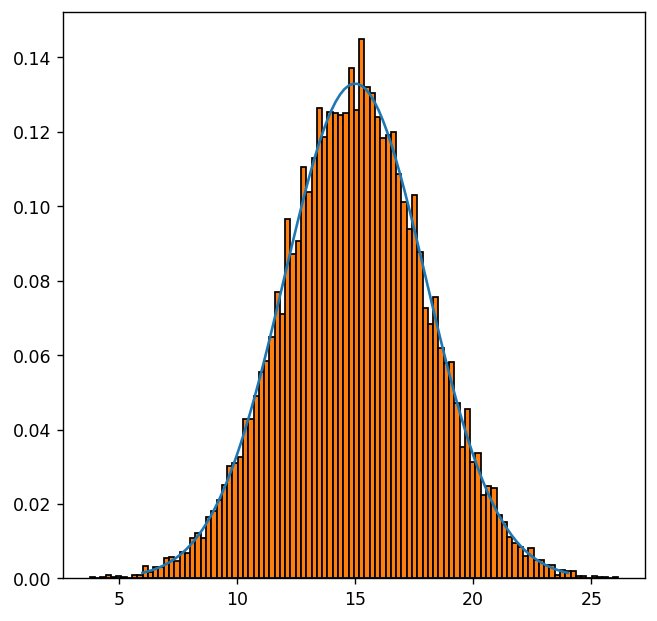

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 15
variance = 3
sigma = variance
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.figure(dpi=125, figsize=(6, 6))
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.hist(aceptados_uni, bins=100, alpha=1, edgecolor='black', linewidth=1, density=True)
plt.show()

**Usando una exponencial y una uniforme**

In [58]:
from scipy.stats import norm

def generar_normal_15_3_exponencial(muestra):
    aceptados = []
    rechazados = []
    for i in range(muestra):
        x1 = random.uniform(5, 25)
        y = np.random.exponential(scale = 1, size = 1)[0]
        if y < norm.pdf(x1, 15,3):
            aceptados.append(x1)
        else:
            rechazados.append(x1)
    return aceptados, rechazados

In [59]:
muestra_exp = 200000
aceptados_exp, rechazados = generar_normal_15_3_exponencial(muestra_exp)

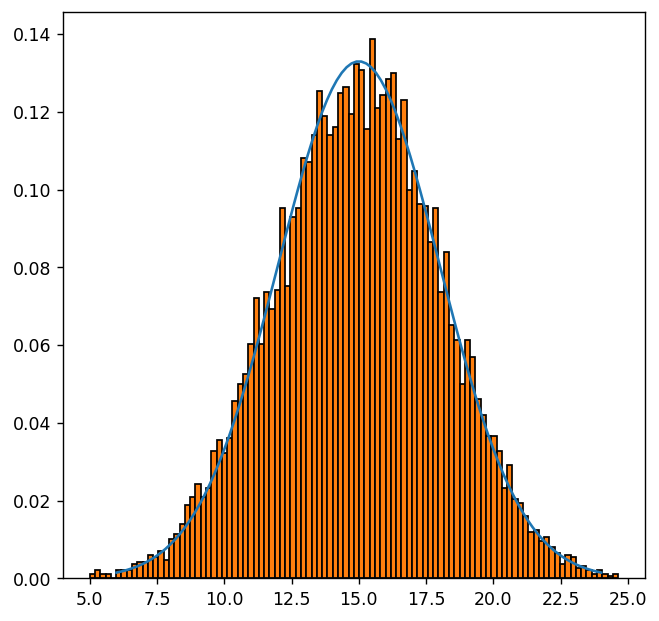

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 15
variance = 3
sigma = variance
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.figure(dpi=125, figsize=(6, 6))
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.hist(aceptados_exp, bins=100, alpha=1, edgecolor='black', linewidth=1, density=True)
plt.show()

### Test 1: Chi cuadrado, nivel de significación 1%

Hipótesis:
- **H0**: La distribucion es normal(15,3)
- **H1**: La distribucion no es normal(15,3)

In [61]:
from scipy.stats import chi2, norm

def chi_cuadrado_normal(resultado, muestra, baldes): 
    frecuencias, extremos = np.histogram(resultado, bins=baldes)
    
    esperado = [muestra*(norm.cdf(extremos[i], 15, 3)- norm.cdf(extremos[i-1], 15, 3)) for i in range(1,len(extremos))]
    
    D2 = sum([(frecuencias[i] - esperado[i])**2/esperado[i] for i in range(len(frecuencias))])
    limiteSuperior = chi2.ppf(0.99, df=baldes-1)# Nivel de significacion 1%

    print("Limite superior: {:.2f} ".format(limiteSuperior))

    print("Estadistico: {:.2f} ".format(D2))

    if D2 <= limiteSuperior:
      print("El test no rechaza la hipótesis nula.")
    else:
      print("El test rechaza la hipótesis nula")

In [62]:
chi_cuadrado_normal(aceptados_uni, muestra_uni, muestra_uni)

Limite superior: 201473.25 
Estadistico: 188159.43 
El test no rechaza la hipótesis nula.


In [63]:
chi_cuadrado_normal(aceptados_uni, muestra_exp, muestra_exp)

Limite superior: 201473.25 
Estadistico: 188159.43 
El test no rechaza la hipótesis nula.


### Test 2: Kolmogorov Smirnov

Hipótesis:
- **H0**: La distribucion es normal(15,3)
- **H1**: La distribucion no es normal(15,3)

In [64]:
evaluar_kstest(aceptados_uni, 'norm', args= (15, 3))

0.003866849943787831
0.9882311766883998
El test no rechaza la hipotesis nula.


In [65]:
evaluar_kstest(aceptados_exp, 'norm', args= (15, 3))

0.012252566331146075
0.11520783655037548
El test no rechaza la hipotesis nula.


## Ejercicio 6

En el trabajo práctico se incluye un archivo con números pseudoaleatorios.

Determine, y justifique, a cuál de las siguientes distribuciones pertenecen los números suministrados:
- Uniforme 

$$ f_x(x)=  \left\{
\begin{array}{ll}
      \frac{1}{10} & 25\leq x \leq 35 \\
      0 & otro \\
\end{array} 
\right. $$ 

- Exponencial

$$ f_x(x)=  \left\{
\begin{array}{ll}
      \frac{1}{30}e^{-\frac{1}{30}x} & x\geq0 \\
      0 & otro \\
\end{array} 
\right. $$ 

- Normal Media 30 Desvío 5

In [66]:
numeros = []
with open("fiuba_simulacion_2021_1c_tp_1_random_numbers.txt", mode='r') as numeros_random:
    numeros_leidos = numeros_random.readlines()        
    numeros_filtrados = filter(lambda numero: numero != '\n', numeros_leidos)
    numeros = list(map(lambda numero: float(numero[:-1]), numeros_filtrados))

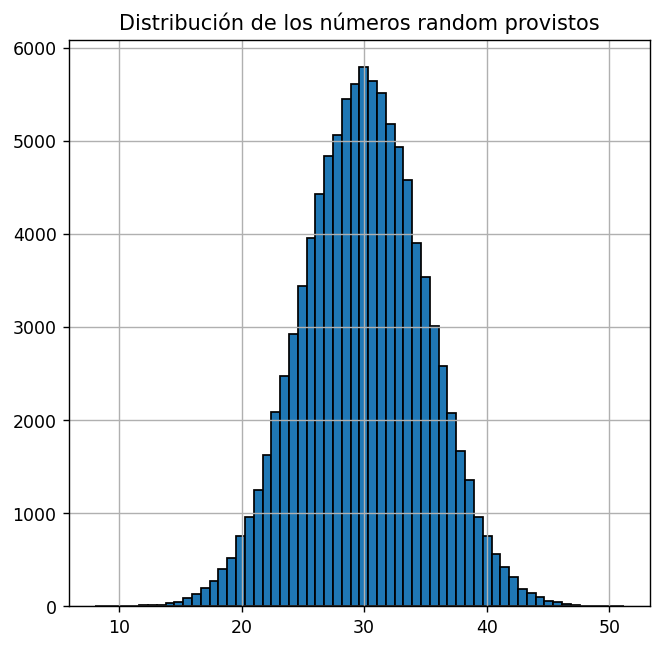

In [67]:
plt.figure(dpi=125, figsize=(6, 6))
plt.title('Distribución de los números random provistos')
plt.hist(numeros, bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()

Por el gráfico se puede observar que se trata de una normal pero se verificará analíticamente si se trata de la normal con la media y desvío provistos por el enunciado.

Para verificar a cuál de las distribuciones pertenecen los números suministrados se utilizará el test de Kolmogorov–Smirnov

### Test Kolmogorov Smirnov



**Uniforme(25, 35)**

Hipotesis para la uniforme:
- **H0**: La distribucion es uniforme(25,35)
- **H1**: La distribucion no es uniforme(25,35)

In [68]:
evaluar_kstest(numeros, 'uniform', args= (25, 35))

0.576957142857143
0.0
El test rechaza la hipotesis nula.


Se puede afirmar que **no** es una uniforme(25, 35)

**Exponencial(1/30)**

Hipotesis para la exponencial:
- **H0**: La distribucion es exponencial(1/30)
- **H1**: La distribucion no es exponencial(1/30)

In [69]:
evaluar_kstest(numeros, 'expon', args= (0, 1/30))

1.0
0.0
El test rechaza la hipotesis nula.


Se puede afirmar que **no** es una exponencial(1/30).

**Normal(30, 5)**

Hipotesis para la normal:
- **H0**: La distribucion es normal(30, 5)
- **H1**: La distribucion no es normal(30, 5)

In [70]:
evaluar_kstest(numeros, 'norm', args= (30, 5))

0.0034093457053632203
0.19499450065928114
El test no rechaza la hipotesis nula.


No se puede afirmar que no es una normal(30, 5) pero tampoco descartarlo con la evidencia propuesta.

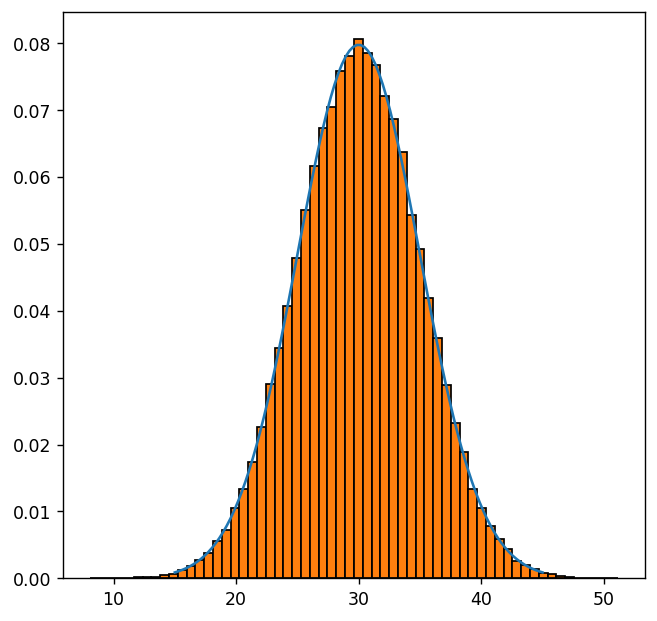

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 30
variance = 5
sigma = variance
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.figure(dpi=125, figsize=(6, 6))
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.hist(numeros, bins=60, alpha=1, edgecolor='black', linewidth=1, density=True)
plt.show()